<center>
  <a href="2.13-Example%20of%20Logistic%20Regression.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.15-Example Regression.ipynb">Example of Regression</a></center>
</center>

# 2.14-Project Logistic Regression

In [83]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [84]:
#read the data using read_csv
df=pd.read_csv('resale_discrete.csv')
# df.describe()

In [86]:
#check the features using columns
#df.columns

In [87]:
df=df[['floor_area_sqm', 'resale_price', 'resale_price']]
df.columns=['floor_area_sqm', 'resale_price', 'class_name']

In [102]:
#remember X should be dataframe df.floor_area_sq won't work
y=df['resale_price']
X=df['floor_area_sqm']

In [103]:
y=y.map({'Low':0, 'Medium':1, 'High':2}) 

In [104]:
class_names=['Low', 'Medium', 'High']

In [105]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=0)

In [106]:
#initiate LogisticRegression method
logreg = LogisticRegression()

In [107]:
X_train = X_train.values.reshape(-1,1)

In [108]:
#train the model using X and y training data
logreg.fit(X_train, y_train)


LogisticRegression()

In [109]:
X_test = X_test.values.reshape(-1,1)

In [110]:
# predict the test data
y_pred=logreg.predict(X_test)

In [111]:
#the above can be simplify using the following
y_pred=logreg.fit(X_train, y_train).predict(X_test)

In [112]:
X = X.values.reshape(-1,1)
# y = y.values.reshape(-1,1)

In [113]:
scores = cross_val_score(logreg, X, y, cv=5)

In [114]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.03)


In [115]:
metrics.accuracy_score(y_test, y_pred) 

0.592

In [116]:
conf_m = confusion_matrix(y_test, y_pred)
conf_m

array([[104,  41,   4],
       [ 34,  87,  68],
       [ 11,  46, 105]])

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Medium'), Text(0, 2.5, 'High')]

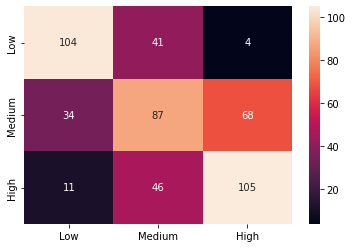

In [120]:
ax = plt.subplot()
sns.heatmap(conf_m,annot=True,ax=ax,fmt='g')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)


In [121]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Low       0.70      0.70      0.70       149
      Medium       0.50      0.46      0.48       189
        High       0.59      0.65      0.62       162

    accuracy                           0.59       500
   macro avg       0.60      0.60      0.60       500
weighted avg       0.59      0.59      0.59       500



https://stats.stackexchange.com/questions/117654/what-does-the-numbers-in-the-classification-report-of-sklearn-mean

In [124]:
pd.crosstab(y_test, y_pred, rownames=['True'], 
            colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,104,41,4,149
1,34,87,68,189
2,11,46,105,162
All,149,174,177,500


Normalized confusion matrix
[[0.7  0.28 0.03]
 [0.18 0.46 0.36]
 [0.07 0.28 0.65]]


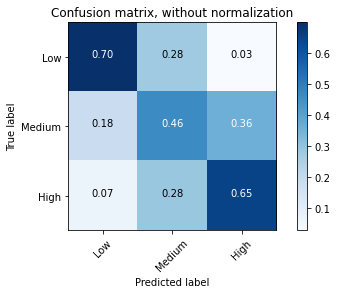

In [125]:

import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

<center>
  <a href="2.13-Example%20of%20Logistic%20Regression.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.15-Example Regression.ipynb">Example of Regression</a></center>
</center>

/home/mpheng/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:ylabel='resale_price'>

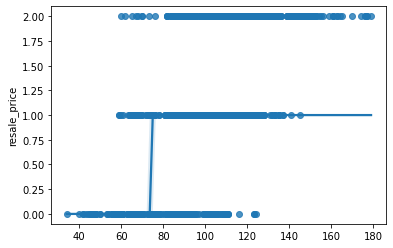

In [126]:
sns.regplot(x=X, y=y, logistic=True)